# WB - credit card fraud
https://www.kaggle.com/dalpozz/creditcardfraud

 ## 2. BILANSOWANIE DANYCH
 
Jak widzieliśmy w części poprzedniej, nasze dane są mocno niezbilansowane, klasa 1 stanowi zaledwie 0.17% wszystkich obserwacji. Taka sytuacja jest niekorzystna dla dalszego modelowania danych, gdyż nie wszystkie klasyfikatory uwzględniają to niezrównoważenie danych, a co za tym idzie starają się wszystkie obserwacje zaklasyfikować do klasy większej. W efekcie wszystkie obserwacje z klasy 1 zostają z automatu źle zaklasyfikowane. Jako, że pracujemy z danymi, dla których niewykrycie obserwacji z klasy 1 jest o wiele bardziej szkodliwe niż zaklasyfikowanie obserwacji z klasy 0 do klasy 1, postaramy się wyeliminować w jak największym stopniu problem niezbilansowanych danych. W tym celu posłużymy się 4 metodami bilansowania (prosty under-sampling, Easy Ensemble, SMOTE oraz prosty undersampling + SMOTE), które zostaną omówione w dalszej części tego etapu.

USUN TO:

PYTANIA:

1. jak wyliczamy wyniki modelu? 10 krotna kroswalidacja
2. które zmienne są najbardziej dyskryminujące tak by użyc ich do wizualizacji tutaj?

TO DO dla mnie (EWA):
2. zrobić easy ensemble, bo tego nie ma

ROC i AUC do liczenia efektywności, można dodać tą confusing matrix ( TN  FN TP FP )
można zawsze nie bawić się zbiorem, a wagami obserwacji jako parametrem w algorytmach

#### ŁADOWANIE PAKIETÓW

In [59]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.ensemble import EasyEnsemble
from imblearn.over_sampling import SMOTE

#### ŁADOWANIE DANYCH

In [60]:
sciezka = "C:/Users/E540/Desktop/WB credit fraud/"
dane = pd.read_csv(sciezka+"creditcard.csv")
dane.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [61]:
print("Wymiar zbioru (obserwacje, zmienne):", dane.shape)
print("Obserwacji z klasy 1: ",sum(dane.Class == 1), "\nObserwacji z klasy 0: ", sum(dane.Class == 0))
print("Ile razy wiekszy zbior z klasy 0: ", sum(dane.Class == 0)/sum(dane.Class == 1))
print("Procent klasy 1: ", sum(dane.Class == 1)/(sum(dane.Class == 1)+sum(dane.Class == 0))*100)

Wymiar zbioru (obserwacje, zmienne): (284807, 31)
Obserwacji z klasy 1:  492 
Obserwacji z klasy 0:  284315
Ile razy wiekszy zbior z klasy 0:  577.87601626
Procent klasy 1:  0.172748563062


Rozdzielenie zmiennych objaśniających od zmiennej odpowiedzi

In [62]:
y = dane.Class
X = dane.drop('Class', 1)

#### PODZIAŁ NA ZBIÓR TESTOWY I TRENINGOWY

Aby móc ocenić skuteczność zbudowanych przez nas modeli dzielimy zbiór na zbiór testowy (30% oryginalnego zbioru danych) oraz zbiór treningowy (70%). W dalszej części naszego projektu będziemy stosować metody bilansowania danych, które w znaczący sposób wpłyną na wielkość zbioru treningowego. Metody te zostaną zastosowane tylko! na zbiorze treningowym, zbiór testowy pozostanie bez zmian.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("TRAIN: \n")
print("Wymiar zbioru treningowego", X_train.shape)
print("Obserwacji z klasy 1 w zbiorze tren: ",sum(y_train == 1), "\nObserwacji z klasy 0 w zbiorze tren: ", sum(y_train  == 0))
print("Procent klasy pierwszej: ", np.round(sum(y_train == 1)/(sum(y_train  == 0)+sum(y_train  == 1))*100,2), "%")



print("\nTEST: \n")
print("Wymiar zbioru testowego", X_test.shape)
print("Obserwacji z klasy 1 w zbiorze test: ",sum(y_test == 1), "\nObserwacji z klasy 0 w zbiorze test: ", sum(y_test  == 0))
print("Procent klasy pierwszej: ", np.round(sum(y_test == 1)/(sum(y_test  == 0)+sum(y_test  == 1))*100,2), "%")

TRAIN: 

Wymiar zbioru treningowego (199364, 30)
Obserwacji z klasy 1 w zbiorze tren:  356 
Obserwacji z klasy 0 w zbiorze tren:  199008
Procent klasy pierwszej:  0.18 %

TEST: 

Wymiar zbioru testowego (85443, 30)
Obserwacji z klasy 1 w zbiorze test:  136 
Obserwacji z klasy 0 w zbiorze test:  85307
Procent klasy pierwszej:  0.16 %


#### PRZYGOTOWANIE NARZĘDZI DO WIZUALIZACJI ZBIORU PRZED I PO ZBILANSOWANIU DANYCH

Wyliczenie granic zmiennych do wykresów na podstawie zbioru treningowego. Zmienne, które będą wizualizowane, są zmiennymi, które uznałyśmy za najbardziej dyskryminujące klasę 1 od klasy 0, czyli PCA4 oraz PCA11.

In [64]:
limits_x = [int(np.min(X_train[y_train == 0].V4))-2, int(np.max(X_train[y_train == 0].V4))+2]
limits_y = [int(np.min(X_train[y_train == 0].V11))-2, int(np.max(X_train[y_train == 0].V11))+4]

Definicja funkcji rysującej zbiór oryginalny i zbiór po resamplingu:

In [65]:
def plot_resampling(ax, X, y, title, limits_x, limits_y):
    c0 = ax.scatter(X[y == 0].V4, X[y == 0].V11, label="Klasa #0", alpha=0.5)
    c1 = ax.scatter(X[y == 1].V4, X[y == 1].V11, label="Klasa #1", alpha=0.5)
    ax.legend((c0, c1), ('Klasa #0', 'Klasa #1'), loc='upper left', ncol=1, labelspacing=0.)
    ax.set_title(title)
    ax.set_xlabel("V4")
    ax.set_ylabel("V11")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim(limits_x)
    ax.set_ylim(limits_y)
   
    
    return c0, c1

### BILANSOWANIE KLAS

### 1. Prosty Undersampling

Prosty undersampling polega na wybraniu z klasy większej tylko części dostępnych danych. Będzie to dokonane przez losowy wybór obserwacji z klasy 0 w ilości odpowiadającej liczbie obserwacji z klasy mniejszej (1). W efekcie uzyskamy pełne zrównoważenie klas i szybsze przetwarzanie danych w czasie budowy modelu. Minusem takiego podejścia jest znaczące ( w naszym przypadku bardzo znaczące) zredukowanie liczby obserwacji ze zbioru oryginalnego i przez to utratę dużej części informacji zawartej w zignorowanych obserwacjach z klasy 0.

Wynikowe zbiory to: X_train_under oraz y_train_under.

In [66]:
# ile jest rekordów z klasy 1
n_fraud_train = sum(y_train == 1) # sumuję liczbę obserwacji z klasy 1
class_1_indices = np.array(X_train[y_train == 1].index) # wybieram indexy wierszy z klasy 1

# losowy wybor n_fraud_tren obserwacji z klasy 0
class_0_indices = np.array(X_train[y_train == 0].index)  # wybieram indexy wierszy z klasy 0
class_0_indices = np.array(np.random.choice(class_0_indices, n_fraud_train, replace = False))  # losuje z nich niektóre

# wybieranie odpowiednich obserwacji
indexy = np.concatenate([class_1_indices, class_0_indices]) # lacze obie tablice

# Under sample dataset
X_train_under = X_train.loc[indexy] # wyciagam obserwacje z danymi wartosciami indeksu
y_train_under = y_train.loc[indexy]

print("rozmiar X po undersamplingu " , X_train_under.shape," rozmiar y po undersamplingu " ,y_train_under.shape[0])
print("procent wielkości oryginalnego zbioru treningowego: ", round(100*X_train_under.shape[0]/ X_train.shape[0],2))
print("rozkład klas w zbiorze treningowym, klasa 1: ", sum(y_train_under == 1), " ", 100*sum(y_train_under == 1)/X_train_under.shape[0],
      "% klasa 0: ",sum(y_train_under == 0)," ", sum(y_train_under == 1)/X_train_under.shape[0]*100, "%")

rozmiar X po undersamplingu  (712, 30)  rozmiar y po undersamplingu  712
procent wielkości oryginalnego zbioru treningowego:  0.36
rozkład klas w zbiorze treningowym, klasa 1:  356   50.0 % klasa 0:  356   50.0 %


##### Wizualizacja efektu

W wyniku przeprowadzonego prostego undersamplingu, rozmiar zbioru treningowego zmniejszył się znacząco: zostało 712 obserwacji co stanowi 0.36% rozmiaru oryginalnego zbioru treningowego. Klasy są równoliczne: pozostały wszystkie obserwacje z klasy 1 i część obserwacji z klasy 0, wybrane losowo. Na wykresach poniżej możemy zaobserwować jakie obserwacje zostały włączonego do nowego zbioru treningowego.

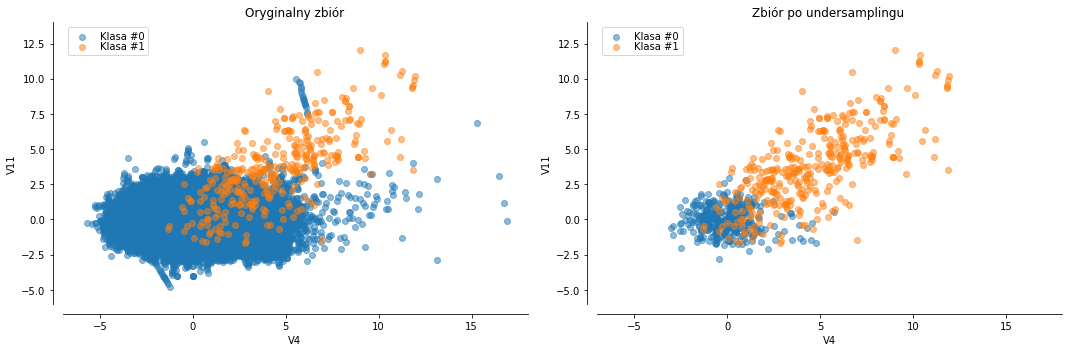

In [67]:
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(15,5)

plot_resampling(ax1, X_train, y_train, 'Oryginalny zbiór', limits_x, limits_y)
plot_resampling(ax2, X_train_under, y_train_under, 'Zbiór po undersamplingu ',  limits_x, limits_y)

plt.tight_layout()
plt.show()

### Easy Ensemble

POPRAWIC OPIS The main drawback of under-sampling is that potentially useful information contained in these ignored examples is neglected. The intuition of our proposed methods is then to wisely explore these ignored data, while keeping the fast training speed of under-sampling. One straightforward way is to sample several subsets independently from N (the majority class), use these subsets to train classifiers separately, and combine the trained classifiers.

Given the minority training set P and the majority
training set N, the under-sampling method randomly
samples a subset N0 from N, where |N 0| < |N |. Usually
we choose |N 0| = |P|, and therefore have |N 0|  |N |
for highly imbalanced problems

In
this method, we independently sample several subsets
N1,N2, . . . ,NT from N. For each subset Ni (1 
i  T), a classifier Hi is trained using Ni and all of
P. All generated classifiers are combined for the final
decision. AdaBoost [29] is used to train the classifier
Hi.

Algorithm 1 The EasyEnsemble algorithm.
1: {Input: A set of minority class examples P, a set of
majority class examples N, |P| < |N |, the number of
subsets T to sample from N, and si, the number of
iterations to train an AdaBoost ensemble Hi}
2: i ( 0
3: repeat
4: i ( i + 1
5: Randomly sample a subset Ni from N, |Ni| = |P|.
6: Learn Hi using P and Ni. Hi is an AdaBoost ensemble
with si weak classifiers hi,j and corresponding weights
i,j . The ensemble’s threshold is i, i.e.
Hi(x) = sgn
Psi
j=1 i,jhi,j(x) − i

.
7: until i = T
8: Output: An ensemble:
H(x) = sgn
PT
i=1
Psi
j=1 i,jhi,j(x) −
PT
i=1 i

.



EasyEnsemble (abbreviated as Easy). CART is
used to train weak classifiers. Number of subsets
T = 4, number of rounds in each AdaBoost
ensemble si = 10.

Ta metoda zaimplementowana w Pythonie zwraca tak naprawdę tylko n zbiorów undersamplowanych. Nasza w tym głowa by je skombinować w jeden klasyfikator...
Trzeba określić jaki klasyfikator do użycia
Trzeba określić liczbę podzbiorów (n_subsets)
Trzeba określić liczbę serii w każdym AdaBoost ensemble, zestawie Adaboost?, (10 np)
http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-twoclass-py

Wynikowe zbiory to: ... opis

https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/tsmcb09.pdf

EasyEnsemble samples several subsets from the majority class, trains a learner using each of them, and combines the outputs of those learners

In [68]:
n_easy = 100
e = EasyEnsemble(n_subsets=n_easy  # bierzemy 100 zbiorów danych (przypomnienie: 577 można wziąc max, by uzyskać rozłączne zbiory)
X_train_easy, y_train_easy = e.fit_sample(X_train, y_train)

SyntaxError: invalid syntax (<ipython-input-68-96c86343a6c1>, line 3)

In [ ]:
# zamiana typu danych na ramki i serie pakietu Pandas
X_train_easy1 =[]
y_train_easy1= []
for i in np.arange(n_easy): 
    X_train_easy1.append(pd.DataFrame(X_train_easy[i], columns= X_train.columns))
    y_train_easy1.append(pd.Series(y_train_easy[i]))
X_train_easy = X_train_easy1.copy()
y_train_easy = y_train_easy1.copy()
print("Wymiary (liczba zbiorow, wymiary zbiorow): (",len(X_train_easy),", ", X_train_easy[0].shape,")")

W wyniku uzyskaliśmy 100 zbiorów (rozłącznych jeśli chodzi o obserwacje z klasy 0) o rozmiarze 712 obserwacji (0.35% zbioru treningowego). Dwa przykładowe uzyskane zbiory pokazano nawykersach poniżej.

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(15,5)

plot_resampling(ax1, X_train, y_train, 'Originalny zbiór', limits_x, limits_y)
plot_resampling(ax2, X_train_easy[0], y_train_easy[0], 'Przykładowy zbiór z Easy Ensemble',  limits_x, limits_y)

plt.tight_layout()
plt.show()

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(15,5)

plot_resampling(ax1, X_train, y_train, 'Originalny zbiór', limits_x, limits_y)
plot_resampling(ax2, X_train_easy[1], y_train_easy[1], 'Inny przykładowy zbiór z Easy Ensemble',  limits_x, limits_y)

plt.tight_layout()
plt.show()

Budowanie klasyfikatorów metodą Adaboost (własna implementacja), będzie trzeba chyba tylko podmienić klasyfikatory na logistic etc (robię to sama)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
predicted = []
for i in np.arange(n_easy):
    
    adaboost = AdaBoostClassifier(DecisionTreeClassifier(),
                             algorithm="SAMME",
                             n_estimators=20)

    adaboost.fit(X_train_easy[i], y_train_easy[i])

    predicted.append(adaboost.predict(X_train_easy[i])) # tu test czy train?

#ostateczny wynik: jak go uzyskać? artykuł patrz
#predicted_final = 
# tu do wizualizacji tego
#http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-twoclass-py

##### 3. SMOTE

SMOTE (z ang. Synthetic Minority Over-sampling Technique) jest metodą typu oversampling, które zwiększa wielkość zbioru treningowego, w efekcie wydłużając czas potrzebny do przetwarzania zbioru. Jej główna idea polega na dodaniu do zbioru sztucznie stworzonych obserwacji z klasy 1 poprzez losową interpolację oryginalnych obserwacji z klasy 1 ich najbliższymi sąsiadami, przez co możemy uzyskać zrównoważenie klas, nie tracąc informacji zawartych w oryginalnym zbiorze danych. Istnieje niestety duże ryzyko zbyt dużego dopasowania się modelu do dostępnych danych treningowych.

Algorytm:
1. Dla każdego punktu z klasy 1 wyznacz jego k najbliższych sąsiadów.
2. Wylosuj jednego z tych sąsiadów.
3. Wylicz różnicę między danym oryginalnym punktem a jego sąsiadem wg formuły
$$nowy.punkt = oryginalny.punkt + rand([0,1])*wylosowany.sąsiad$$
4. Dodaj nowy punkt do zbioru treningowego.
5. Powtarzaj aż uzyskasz odpowiednią liczbę nowych obserwacji.

W efekcie dostaniemy zbiór 2-krotnie większy niż zbiór oryginalny, z idealnym zrównoważeniem klas (wszystkie obserwacje z klasy 0 + tyle samo obserwacji z klasy 1 (oryginalne obserwacje z klasy 1 + sztuczne obserwacje z klasy 1). Są 4 rodzaje SMOTE, my skupimy się tylko na tym podstawowym: "regular".

Zbiory wynikowe to X_train_smote i y_train_smote.

In [69]:
sm = SMOTE(kind='regular', k_neighbors=10) # parametry k_neighbours można próbować zmienić
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)
# zmiana typy zmiennych
X_train_smote = pd.DataFrame(X_train_smote, columns=X_train.columns)
y_train_smote = pd.Series(y_train_smote)

In [70]:
print("rozmiar X po SMOTE " ,  X_train_smote.shape)
print("procent wielkości oryginalnego zbioru treningowego: ", round(100* X_train_smote.shape[0]/ X_train.shape[0],2))
print("rozkład klas w zbiorze treningowym, klasa 1: ", sum(y_train_smote == 1), " ", 100*sum(y_train_smote == 1)/X_train_smote.shape[0],
      "% klasa 0: ",sum(y_train_smote == 0)," ", sum(y_train_smote == 1)/X_train_smote.shape[0]*100, "%")

rozmiar X po SMOTE  (398016, 30)
procent wielkości oryginalnego zbioru treningowego:  199.64
rozkład klas w zbiorze treningowym, klasa 1:  199008   50.0 % klasa 0:  199008   50.0 %


Wynikowy zbiór posiada 398016 obserwacji co stanowi 200% oryginalnego zbioru treningowego. Na poniższym wykresie możemy zobaczyć jak wygląda nowy zbiór treningowy - widać, że zostały zachowane wszystkie obserwacje z klasy 0 oraz że nowe  dodane obserwacje klasy 1 znajdują się w obszarze pomiędzy oryginalnymi obserwacjami z klasy 1.

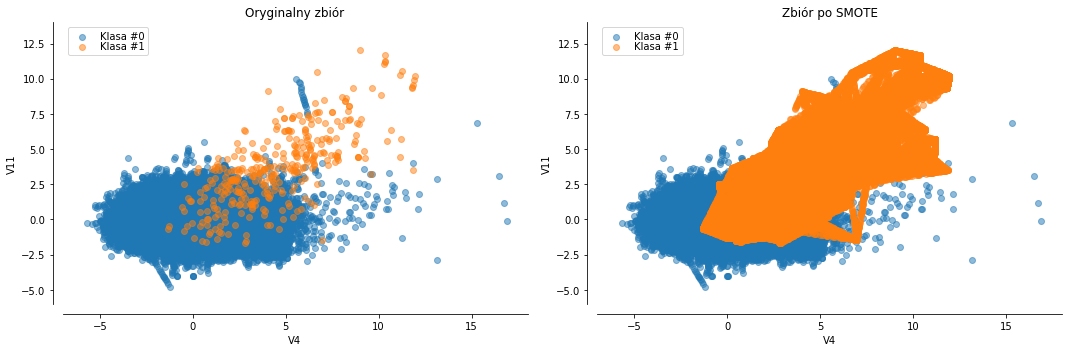

In [71]:
f.clear
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(15,5)

plot_resampling(ax1, X_train, y_train, 'Oryginalny zbiór', limits_x, limits_y)
plot_resampling(ax2, X_train_smote, y_train_smote, 'Zbiór po SMOTE',  limits_x, limits_y)

plt.tight_layout()
plt.show()

##### 4. SMOTE + prosty undersampling

Przedstawiony powyżej prosty undersampling i metoda SMOTE, mogą skłonić do poszukiwania pośredniego między nimi. Tj. do rozważenia prostego undersamplingu na klasie 0 na pewnym ustalonym poziomie wraz z zastosowanie SMOTE na klasie 1, tak by w efekcie dostać zrównoważony zbiór, ale ignorujący mniejszą ilość oryginalnych danych niż prosty undersampling i dodający mniej powtórzeń obserwacji z klasy 1,  w ten sposób zmniejszający ryzyko overfittingu modeli.

Możemy zapisać tą metodę jako:
1. Wybierz procent obserwacji z klasy 0, które mają zostać zachowane (niech T oznacza odpowiadającą mu liczbę obserwacji).
2. Dokonaj prostego undersamplingu na klasie 0 (tj. wybierz losowo T obserwacji z klasy 0).
3. Zastosuj SMOTE na klasie 0, tak by w efekcie uzyskać w zbiorze T obserwacji z klasy 1

Procent obserwacji pozostawionych w klasie 0 będzie parametrem, który należy dobrać odpowiedno do zbioru danych. Jeśli będzie to 100% uzyskamy metodę SMOTE, jeśli 0.36% w naszym przypadku, metodę prostego undersamplingu.

Dla potrzeb naszych modeli stwórzmy zbiory treningowego dla 3 procentów:  1%, 10%, 50%.

##### Metoda mieszana dla 1%

Zbiory wynikowe: X_train_comb1, y_train_comb1

In [72]:
procent = 1
n = int(sum(y_train == 0) * procent/100)
print("obserwacji z klasy 0 pozostawionych: ", n)

# losowy wybor n obserwacji z klasy 0
class_0_indices = np.array(X_train[y_train == 0].index)  # wybieram indexy wierszy z klasy 0
class_0_indices = np.array(np.random.choice(class_0_indices, n, replace = False))  # losuje z nich niektóre

# wszytkie obserwacje z klasy 1
class_1_indices = np.array(X_train[y_train == 1].index)
# wybieranie odpowiednich obserwacji
indexy = np.concatenate([class_1_indices, class_0_indices]) # lacze obie tablice

# Under sample dataset
X_train_comb1 = X_train.loc[indexy] # wyciagam obserwacje z danymi wartosciami indeksu
y_train_comb1 = y_train.loc[indexy]

#SMOTE
sm = SMOTE(kind='regular', k_neighbors=5) 
X_train_comb1 , y_train_comb1 = sm.fit_sample(X_train_comb1, y_train_comb1)
# zmiana typy zmiennych
X_train_comb1  = pd.DataFrame(X_train_comb1 , columns=X_train.columns)
y_train_comb1 = pd.Series(y_train_comb1)

print("rozmiar X po zbilansowaniu " ,  X_train_comb1.shape)
print("procent wielkości oryginalnego zbioru treningowego: ", round(100* X_train_comb1.shape[0]/ X_train.shape[0],2))
print("rozkład klas w zbiorze treningowym, klasa 1: ", sum(y_train_comb1 == 1), " ", 100*sum(y_train_comb1 == 1)/X_train_comb1.shape[0],
      "% klasa 0: ",sum(y_train_comb1 == 0)," ", sum(y_train_comb1 == 1)/X_train_comb1.shape[0]*100, "%")

obserwacji z klasy 0 pozostawionych:  1990
rozmiar X po zbilansowaniu  (3980, 30)
procent wielkości oryginalnego zbioru treningowego:  2.0
rozkład klas w zbiorze treningowym, klasa 1:  1990   50.0 % klasa 0:  1990   50.0 %


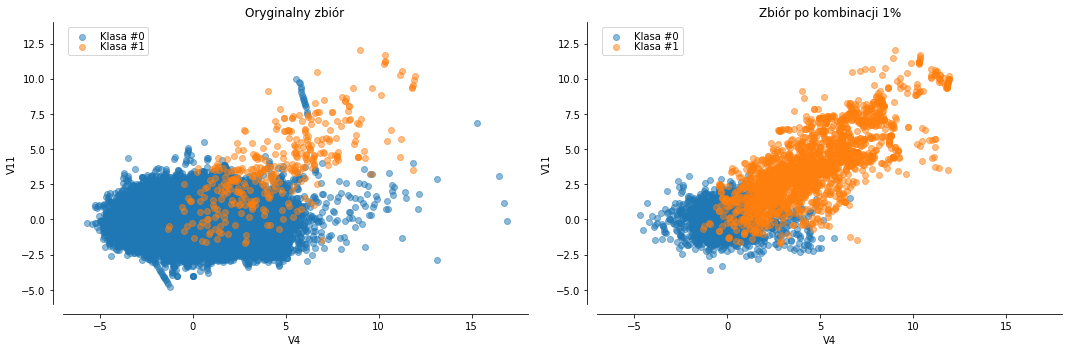

In [73]:
f.clear
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(15,5)

plot_resampling(ax1, X_train, y_train, 'Oryginalny zbiór', limits_x, limits_y)
plot_resampling(ax2, X_train_comb1, y_train_comb1, 'Zbiór po kombinacji 1%',  limits_x, limits_y)

plt.tight_layout()
plt.show()

##### Metoda mieszana dla 10%

Zbiory wynikowe: X_train_comb10, y_train_comb10

In [74]:
procent = 10
n = int(sum(y_train == 0) * procent/100)
print("obserwacji z klasy 0 pozostawionych: ", n)

# losowy wybor n obserwacji z klasy 0
class_0_indices = np.array(X_train[y_train == 0].index)  # wybieram indexy wierszy z klasy 0
class_0_indices = np.array(np.random.choice(class_0_indices, n, replace = False))  # losuje z nich niektóre

# wszytkie obserwacje z klasy 1
class_1_indices = np.array(X_train[y_train == 1].index)
# wybieranie odpowiednich obserwacji
indexy = np.concatenate([class_1_indices, class_0_indices]) # lacze obie tablice

# Under sample dataset
X_train_comb10 = X_train.loc[indexy] # wyciagam obserwacje z danymi wartosciami indeksu
y_train_comb10 = y_train.loc[indexy]

#SMOTE
sm = SMOTE(kind='regular', k_neighbors=5) 
X_train_comb10 , y_train_comb10 = sm.fit_sample(X_train_comb10, y_train_comb10)
# zmiana typy zmiennych
X_train_comb10  = pd.DataFrame(X_train_comb10 , columns=X_train.columns)
y_train_comb10 = pd.Series(y_train_comb10)

print("rozmiar X po zbilansowaniu " ,  X_train_comb10.shape)
print("procent wielkości oryginalnego zbioru treningowego: ", round(100* X_train_comb10.shape[0]/ X_train.shape[0],2))
print("rozkład klas w zbiorze treningowym, klasa 1: ", sum(y_train_comb10 == 1), " ", 100*sum(y_train_comb10 == 1)/X_train_comb10.shape[0],
      "% klasa 0: ",sum(y_train_comb10 == 0)," ", sum(y_train_comb10 == 1)/X_train_comb10.shape[0]*100, "%")

obserwacji z klasy 0 pozostawionych:  19900
rozmiar X po zbilansowaniu  (39800, 30)
procent wielkości oryginalnego zbioru treningowego:  19.96
rozkład klas w zbiorze treningowym, klasa 1:  19900   50.0 % klasa 0:  19900   50.0 %


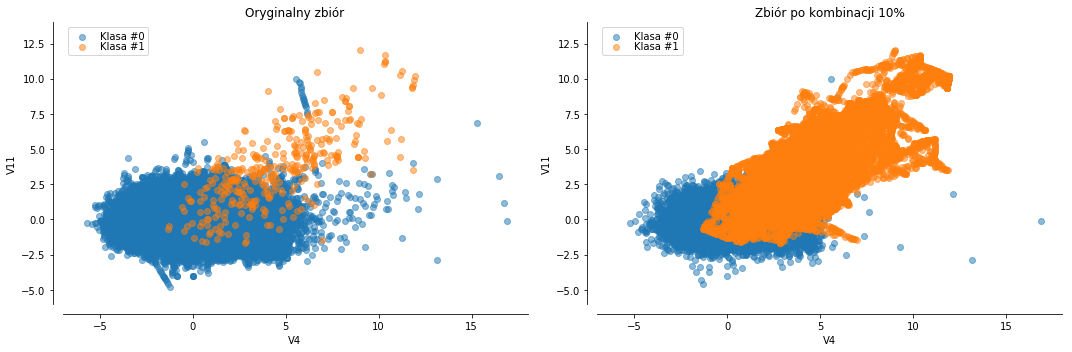

In [75]:
f.clear
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(15,5)

plot_resampling(ax1, X_train, y_train, 'Oryginalny zbiór', limits_x, limits_y)
plot_resampling(ax2, X_train_comb10, y_train_comb10, 'Zbiór po kombinacji 10%',  limits_x, limits_y)

plt.tight_layout()
plt.show()

##### Metoda mieszana dla 50%

Zbiory wynikowe to: X_train_comb50, y_train_comb50.

In [76]:
procent = 50
n = int(sum(y_train == 0) * procent/100)
print("obserwacji z klasy 0 pozostawionych: ", n)

# losowy wybor n obserwacji z klasy 0
class_0_indices = np.array(X_train[y_train == 0].index)  # wybieram indexy wierszy z klasy 0
class_0_indices = np.array(np.random.choice(class_0_indices, n, replace = False))  # losuje z nich niektóre

# wszytkie obserwacje z klasy 1
class_1_indices = np.array(X_train[y_train == 1].index)
# wybieranie odpowiednich obserwacji
indexy = np.concatenate([class_1_indices, class_0_indices]) # lacze obie tablice

# Under sample dataset
X_train_comb50 = X_train.loc[indexy] # wyciagam obserwacje z danymi wartosciami indeksu
y_train_comb50 = y_train.loc[indexy]

#SMOTE
sm = SMOTE(kind='regular', k_neighbors=5) 
X_train_comb50 , y_train_comb50 = sm.fit_sample(X_train_comb50, y_train_comb50)
# zmiana typy zmiennych
X_train_comb50  = pd.DataFrame(X_train_comb50 , columns=X_train.columns)
y_train_comb50 = pd.Series(y_train_comb50)

print("rozmiar X po zbilansowaniu " ,  X_train_comb50.shape)
print("procent wielkości oryginalnego zbioru treningowego: ", round(100* X_train_comb50.shape[0]/ X_train.shape[0],2))
print("rozkład klas w zbiorze treningowym, klasa 1: ", sum(y_train_comb50 == 1), " ", 100*sum(y_train_comb50 == 1)/X_train_comb50.shape[0],
      "% klasa 0: ",sum(y_train_comb50 == 0)," ", sum(y_train_comb50 == 1)/X_train_comb50.shape[0]*100, "%")

obserwacji z klasy 0 pozostawionych:  99504
rozmiar X po zbilansowaniu  (199008, 30)
procent wielkości oryginalnego zbioru treningowego:  99.82
rozkład klas w zbiorze treningowym, klasa 1:  99504   50.0 % klasa 0:  99504   50.0 %


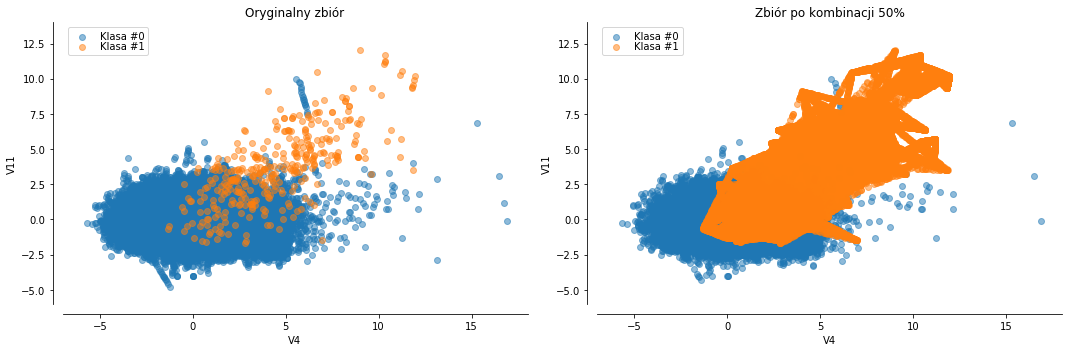

In [77]:
f.clear
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(15,5)

plot_resampling(ax1, X_train, y_train, 'Oryginalny zbiór', limits_x, limits_y)
plot_resampling(ax2, X_train_comb50, y_train_comb50, 'Zbiór po kombinacji 50%',  limits_x, limits_y)

plt.tight_layout()
plt.show()

# Modele

Marta